통계분석

In [1]:
# 와인품질 등급 예측하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/MLP_bigdata'

In [4]:
pwd

'/content'

In [5]:
%cd /content/drive/MyDrive/MLP_bigdata
# cd : change directory

/content/drive/MyDrive/MLP_bigdata


In [ ]:
pd.read_csv('./winequality-red.csv',sep = ';',header= 0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df_red =pd.read_csv('./winequality-red.csv',sep = ';',header= 0)
df_red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
# 전처리한 파일 --> csv 파일로 변환

df_red.to_csv('./winequality-red-mod.csv',index=False)

In [ ]:
pd.read_csv('./winequality-red-mod.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df_white =pd.read_csv('./winequality-white.csv',sep = ';',header= 0)
df_white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
df_white.to_csv('./winequality-white-mod.csv',index=False)

In [ ]:
pd.read_csv('./winequality-white-mod.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


데이터 병합하기

In [ ]:
df_red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
df_white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
df_red.insert(0,column='type', value='red')
df_red.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
df_white.insert(0,column='type', value='white')
df_white.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
print(df_red.shape)
print(df_white.shape)

(1599, 13)
(4898, 13)


In [ ]:
# 두 개의 csv 파일 병합

pd.concat([df_red,df_white])

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
raw = pd.concat([df_red,df_white])
wine = raw.copy()
wine.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
wine.shape

(6497, 13)

In [ ]:
wine.to_csv('./wine.csv',index = False)

EDA(Exploratory Data Analysis)_ 탐색적 데이터분석

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
# 컬럼 이름의 띄어쓰기를 밑줄로 바꾸기

wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
wine.columns.str.replace(' ','_')

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
wine.columns = wine.columns.str.replace(' ','_')

In [ ]:
wine.head(3)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
# 요약통계

wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [ ]:
sorted(wine['quality'].unique())
# default : 오름차순

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

데이터 모델링

In [ ]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [ ]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [ ]:
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [ ]:
wine.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


In [ ]:
# agg() 예시

data = {
    'A' : [1,2,3,4],
    'B' : [10,20,30,40],
    'C' : [100,200,300,400]
}

temp = pd.DataFrame(data)
print(temp.head(3))
print()

result = temp.agg(['mean','sum','std'])
print(result)

   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300

              A           B            C
mean   2.500000   25.000000   250.000000
sum   10.000000  100.000000  1000.000000
std    1.290994   12.909944   129.099445


독립표본 T검정

In [ ]:
!pip install scipy

In [ ]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [ ]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.loc[wine['type']=='red','quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
red_wine_quality = wine.loc[wine['type']=='red','quality']
white_wine_quality = wine.loc[wine['type']=='white','quality']

In [ ]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var= False)
# pvalue=8.168348870049682e-24 < 0.05
# 두 집간간 평균의 차이가 있음
# > 귀무가설로 설정한 H0 : '두 집단간 평균의 차이는 없다'는 기각 되고
# > 대립가설로 설정한 H1 : '두 집단간 평균의 차이는 있다'는 채택된다.
# (단, 일반화는 아님: 전제조건)

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

회귀분석

In [ ]:
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
rformula = 'quality ~ fixed_acidity+ volatile_acidity+ citric_acid+\
            residual_sugar+ chlorides+ free_sulfur_dioxide+\
            total_sulfur_dioxide+ density+ pH+ sulphates+ alcohol'

In [ ]:
result = ols(rformula,data = wine).fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        04:24:05   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
rformula_out = 'quality ~ fixed_acidity+ volatile_acidity+\
            residual_sugar+ free_sulfur_dioxide+\
            total_sulfur_dioxide+ density+ pH+ sulphates+ alcohol'

In [ ]:
result2 = ols(rformula_out,data = wine).fit()

In [ ]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     296.7
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        04:24:05   Log-Likelihood:                -7217.8
No. Observations:                6497   AIC:                         1.446e+04
Df Residuals:                    6487   BIC:                         1.452e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               60.0409     11.645      5.156      0.000      37.212      82.870
fixed_acidity            0.0662      0.015      4.412      0.000       0.037       0.096
volatile_acidity        -1.3043      0.071    -18.445      0.000      -1.443      -1.166
residual_sugar           0.0453      0.005      9.024      0.000       0.035       0.055
free_sulfur_dioxide      0.0059      0.001      7.911      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -9.217      0.000      -0.003      -0.002
density                -59.4185     11.873     -5.004      0.000     -82.694     -36.143
pH                       0.4782      0.088      5.411      0.000       0.305       0.651
sulphates                0.7378      0.075      9.903      0.000       0.592       0.884
alcohol                  0.2647      0.017     15.886      0.000       0.232       0.297
==============================================================================
Omnibus:                      144.178   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.085
Skew:                          -0.004   Prob(JB):                     2.56e-71
Kurtosis:                       4.096   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

회구분석 모델로 새로운 샘플 품질 등급 예측하기

In [ ]:
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
wine.columns.difference(['quality','type'])
# difference() : 데이터프레임만 사용
# ['quality','type']에 속하지 않은 열들을 반환

Index(['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity'],
      dtype='object')

In [ ]:
condition = wine.columns.difference(['quality','type'])

wine[condition]

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.99780,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.99680,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.99700,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.99800,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.99780,7.4,11.0,3.51,1.9,0.56,34.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...
4893,11.2,0.039,0.29,0.99114,6.2,24.0,3.27,1.6,0.50,92.0,0.21
4894,9.6,0.047,0.36,0.99490,6.6,57.0,3.15,8.0,0.46,168.0,0.32
4895,9.4,0.041,0.19,0.99254,6.5,30.0,2.99,1.2,0.46,111.0,0.24
4896,12.8,0.022,0.30,0.98869,5.5,20.0,3.34,1.1,0.38,110.0,0.29


In [ ]:
sample1 = wine[condition]
sample1.head(3)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76


In [ ]:
sample1[:5]

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [ ]:
sample1 = sample1[:5][:]

In [ ]:
y_pred = result2.predict(sample1)

In [ ]:
y_pred

0    4.975950
1    4.905454
2    5.016237
3    5.687222
4    4.975950
dtype: float64

In [ ]:
wine[:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

결과 시각화

In [ ]:
!pip install seaborn

Text(0.5, 1.0, 'Quality of Wine Type')

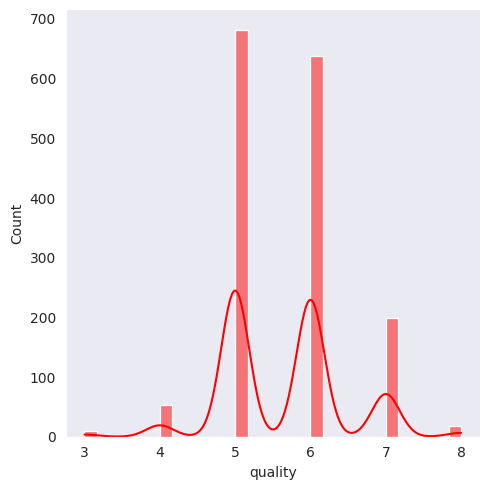

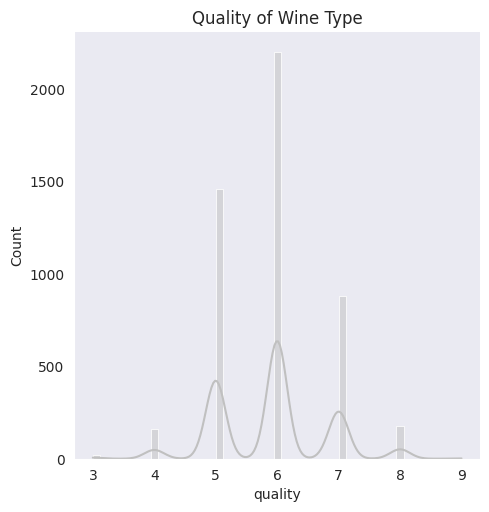

In [ ]:
import seaborn as sns

sns.set_style('dark')
sns.displot(red_wine_quality,kde=True, color = 'red', label = 'red_wine')
sns.displot(white_wine_quality,kde=True, color = 'silver', label = 'white_wine')
plt.title('Quality of Wine Type')


부분 회귀 플롯(plot)  시각화

In [ ]:
import statsmodels.api as sm

In [ ]:
# fixed_acidity -> quality 에 미치는 영향력 시각화

list(set(wine.columns).difference(set(['quality','fixed_acidity'])))

['chlorides',
 'total_sulfur_dioxide',
 'density',
 'volatile_acidity',
 'alcohol',
 'free_sulfur_dioxide',
 'type',
 'citric_acid',
 'residual_sugar',
 'pH',
 'sulphates']

In [ ]:
others = list(set(wine.columns).difference(set(['quality','fixed_acidity'])))

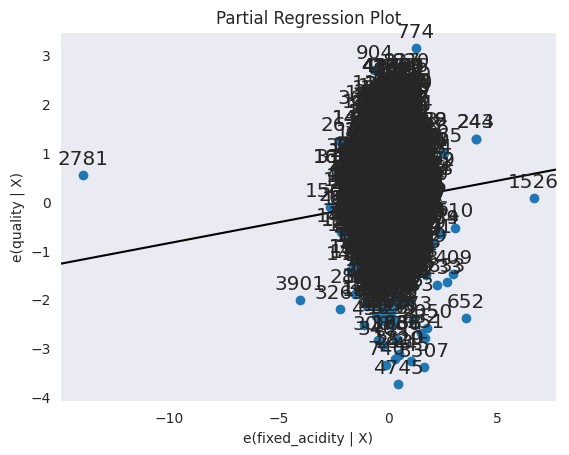

In [ ]:
p, resids = sm.graphics.plot_partregress('quality','fixed_acidity',
                                         others, data = wine, ret_coords=True)
#plot_partregress
# quality : 종속변수, fixed_acidity : 독립변수
# others : 통제변수
# ret_coords = True : 부분 회귀 플롯의 점들의 좌표변환

<function matplotlib.pyplot.show(close=None, block=None)>

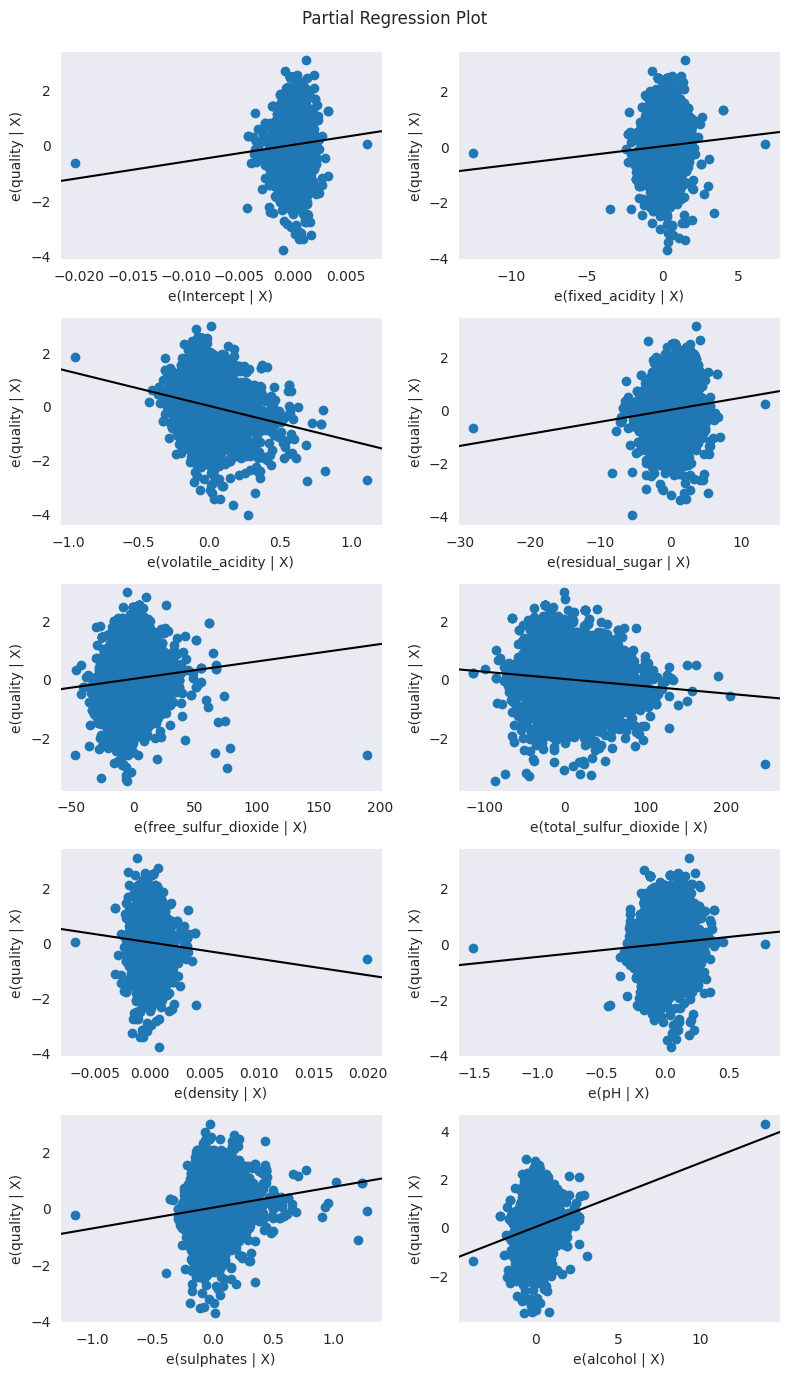

In [ ]:
#각 독립변수가 종속변수 quality에 미치는 영향력 시각화

fig = plt.figure(figsize = (8,14))
sm.graphics.plot_partregress_grid(result2, fig = fig)
plt.show

상관분석과 히트맵

In [ ]:
# 상관분석

# 타이타닉 호 생존율 분석하기


1. 데이터 수집

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw = sns.load_dataset('titanic')
titanic = raw.copy()


In [ ]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [ ]:
pwd

'/content/drive/MyDrive/MLP_bigdata'

In [ ]:
path = '/content/drive/MyDrive/MLP_bigdata'

In [ ]:
%cd /content/drive/MyDrive/MLP_bigdata

/content/drive/MyDrive/MLP_bigdata


In [ ]:
pwd

'/content/drive/MyDrive/MLP_bigdata'

In [ ]:
titanic.to_csv('./titanic.csv',index = False)

2. 데이터준비

In [ ]:
# 결측치여부 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# age 결측값 처리
# mean, median 중 선택

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(titanic['age'].mean())
print(titanic['age'].median())

29.69911764705882
28.0


In [ ]:
# age 열의 결측값을 '평균'으로 치환하기

titanic['age'].fillna(titanic['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [ ]:
# age 열의 결측값을 '중위수'으로 치환하기

titanic['age'].fillna(titanic['age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [ ]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic['age'].isnull().sum()

0

In [ ]:
titanic['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [ ]:
titanic['embarked'].isnull().sum()

2

In [ ]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [ ]:
titanic['embark_town']
del titanic['embark_town']

In [ ]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  deck        203 non-null    category
 12  alive       891 non-null    object  
 13  alone       891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 73.7+ KB


In [ ]:
# deck

print(203/891)  # non - null값
print(1-(203/891))# null 값

0.22783389450056116
0.7721661054994389


In [ ]:
titanic['deck'][:3]

0    NaN
1      C
2    NaN
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
titanic['deck'].isnull().sum()

688

In [ ]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [ ]:
del titanic['deck']

In [ ]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [ ]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
titanic['survived'][titanic['sex']== 'female'].value_counts()

survived
1    233
0     81
Name: count, dtype: int64

In [ ]:
titanic['survived'][titanic['sex']== 'male'].value_counts()

survived
0    468
1    109
Name: count, dtype: int64

In [ ]:
titanic['sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [ ]:
titanic['sex'].replace(['male','female'],[1,2],inplace = True)

In [ ]:
titanic['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic['embarked'].replace(['S','C','Q'],[1,2,3],inplace = True)

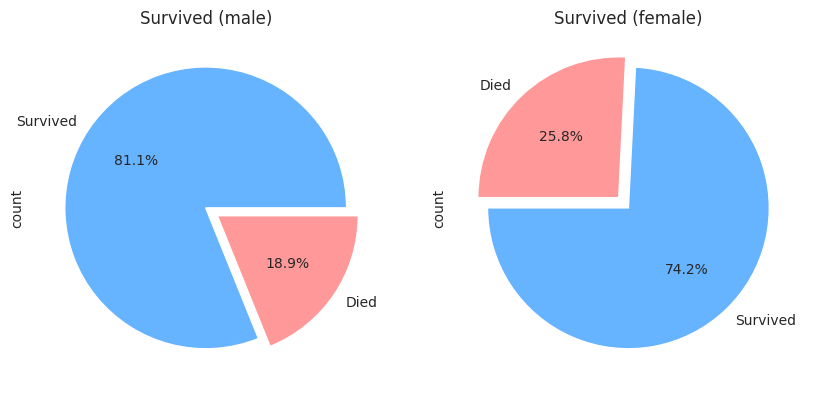

In [ ]:
import matplotlib.pyplot as plt

# 1행 2열의 서브플롯 생성
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# 남성 생존 여부 파이 차트
titanic['survived'][titanic['sex'] == 1].value_counts().plot.pie(
    explode=[0, 0.1],       # 생존자 조각을 0.1만큼 떨어뜨림
    autopct='%1.1f%%',      # 백분율 표시
    colors=['#66B3FF','#FF9999'],
    labels = ['Survived','Died'],
    ax=ax[0]                # 첫 번째 서브플롯에 그리기
)

# 여성 생존 여부 파이 차트
titanic['survived'][titanic['sex'] == 2].value_counts().plot.pie(
    explode=[0, 0.1],       # 생존자 조각을 0.1만큼 떨어뜨림
    autopct='%1.1f%%',      # 백분율 표시
    colors=['#66B3FF','#FF9999'],
    labels = ['Survived','Died'],
    startangle=180,

    ax=ax[1]                # 두 번째 서브플롯에 그리기
)



# 서브플롯 제목 설정
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

# 그래프 표시
plt.show()


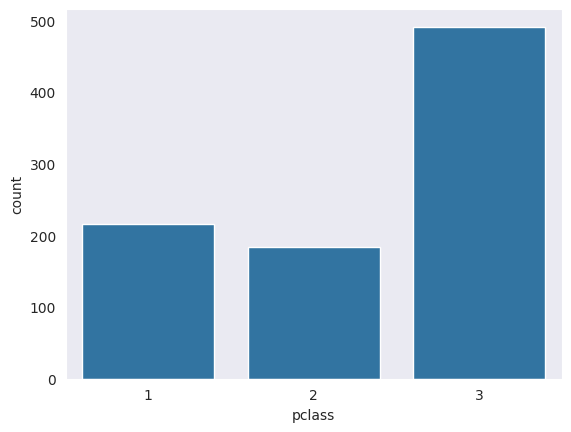

In [ ]:
sns.countplot(x='pclass',data = titanic)
plt.show()

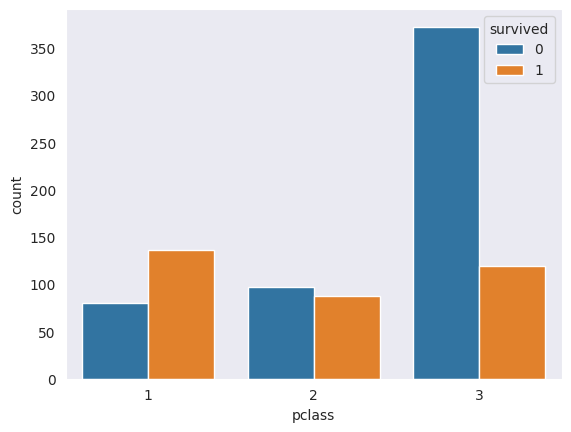

In [ ]:
sns.countplot(x='pclass',hue = 'survived',data = titanic)
plt.show()

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,Third,man,True,no,False
1,1,1,2,38.0,1,0,71.2833,2,First,woman,False,yes,False
2,1,3,2,26.0,0,0,7.9250,1,Third,woman,False,yes,True
3,1,1,2,35.0,1,0,53.1000,1,First,woman,False,yes,False
4,0,3,1,35.0,0,0,8.0500,1,Third,man,True,no,True


In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype='object')

In [ ]:
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked']]
df[:3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,2,38.0,1,0,71.2833,2
2,1,3,2,26.0,0,0,7.9250,1


데이터 모델링(상관분석)

In [ ]:
# 상관분석

df.corr(method = 'pearson')

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
sibsp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [ ]:
df_corr = df.corr(method = 'pearson')

In [ ]:
df_corr.to_csv('./df_corr.csv',index = False)

상관계수 구하기

In [ ]:
titanic['adult_male']

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: adult_male, Length: 891, dtype: bool

In [ ]:
titanic['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [ ]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053247

In [ ]:
titanic['survived'].corr(titanic['fare'])

0.25730652238496227

결과 시각화

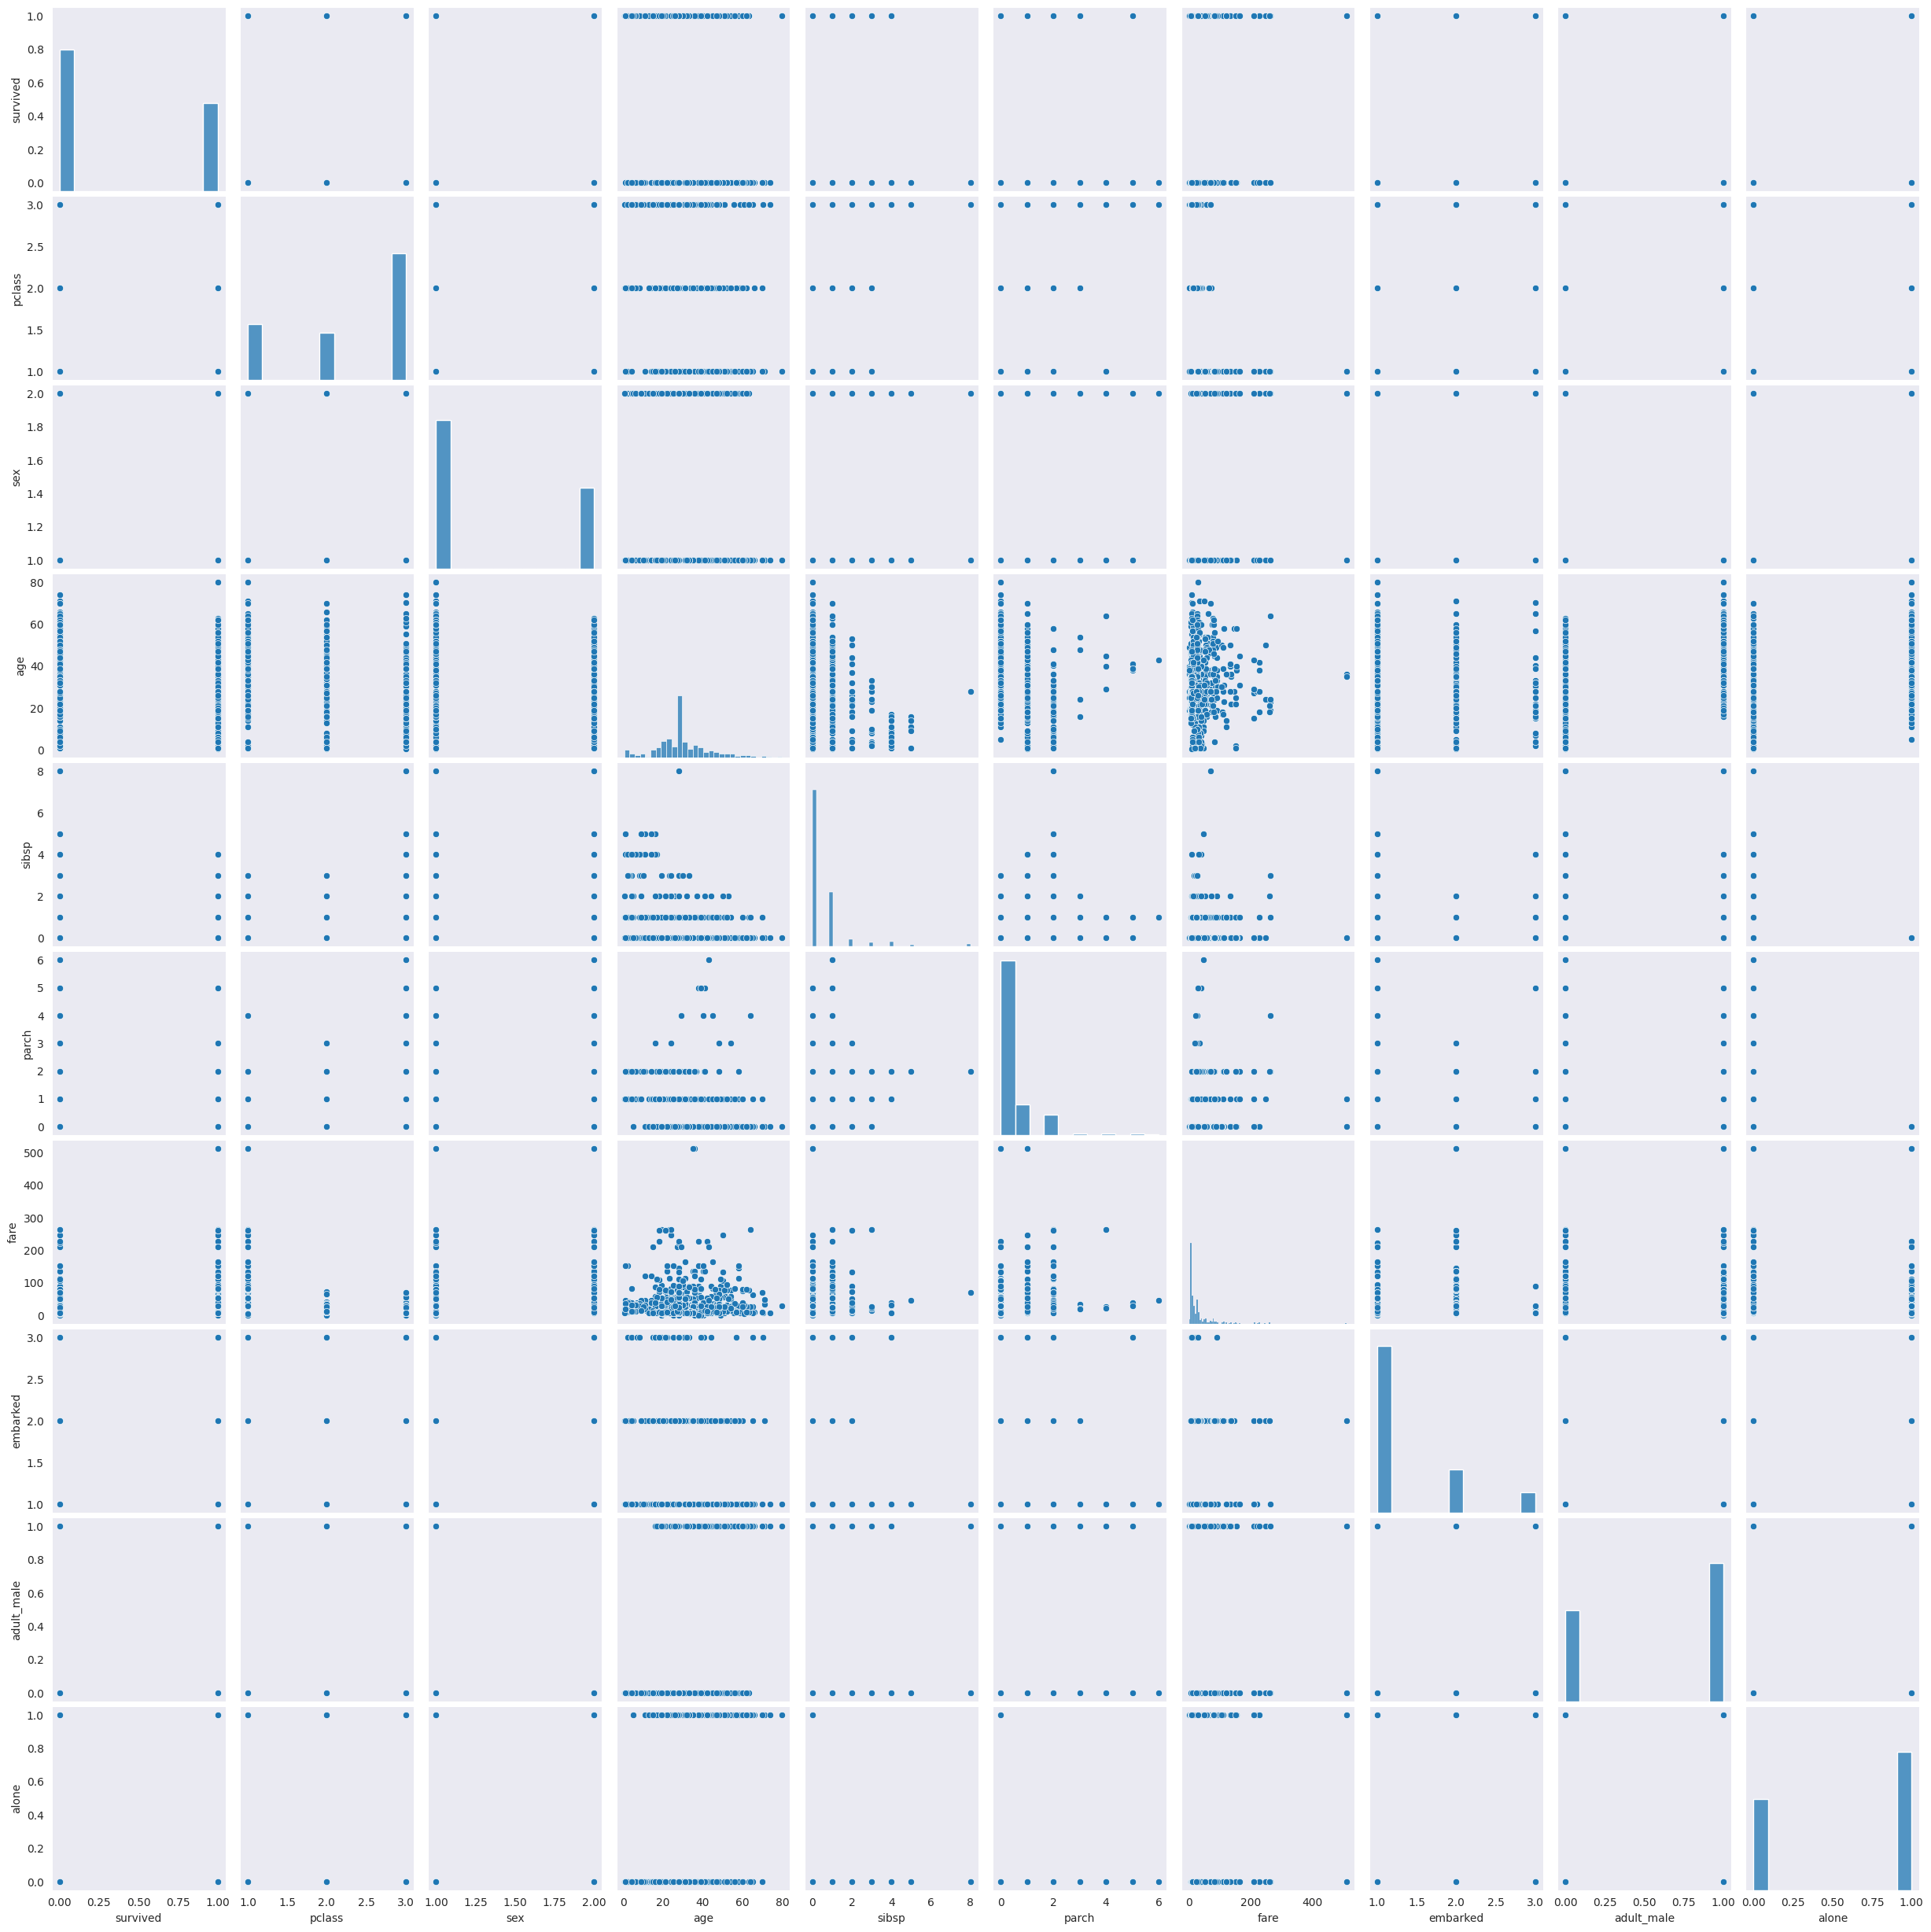

In [ ]:
sns.pairplot(titanic)

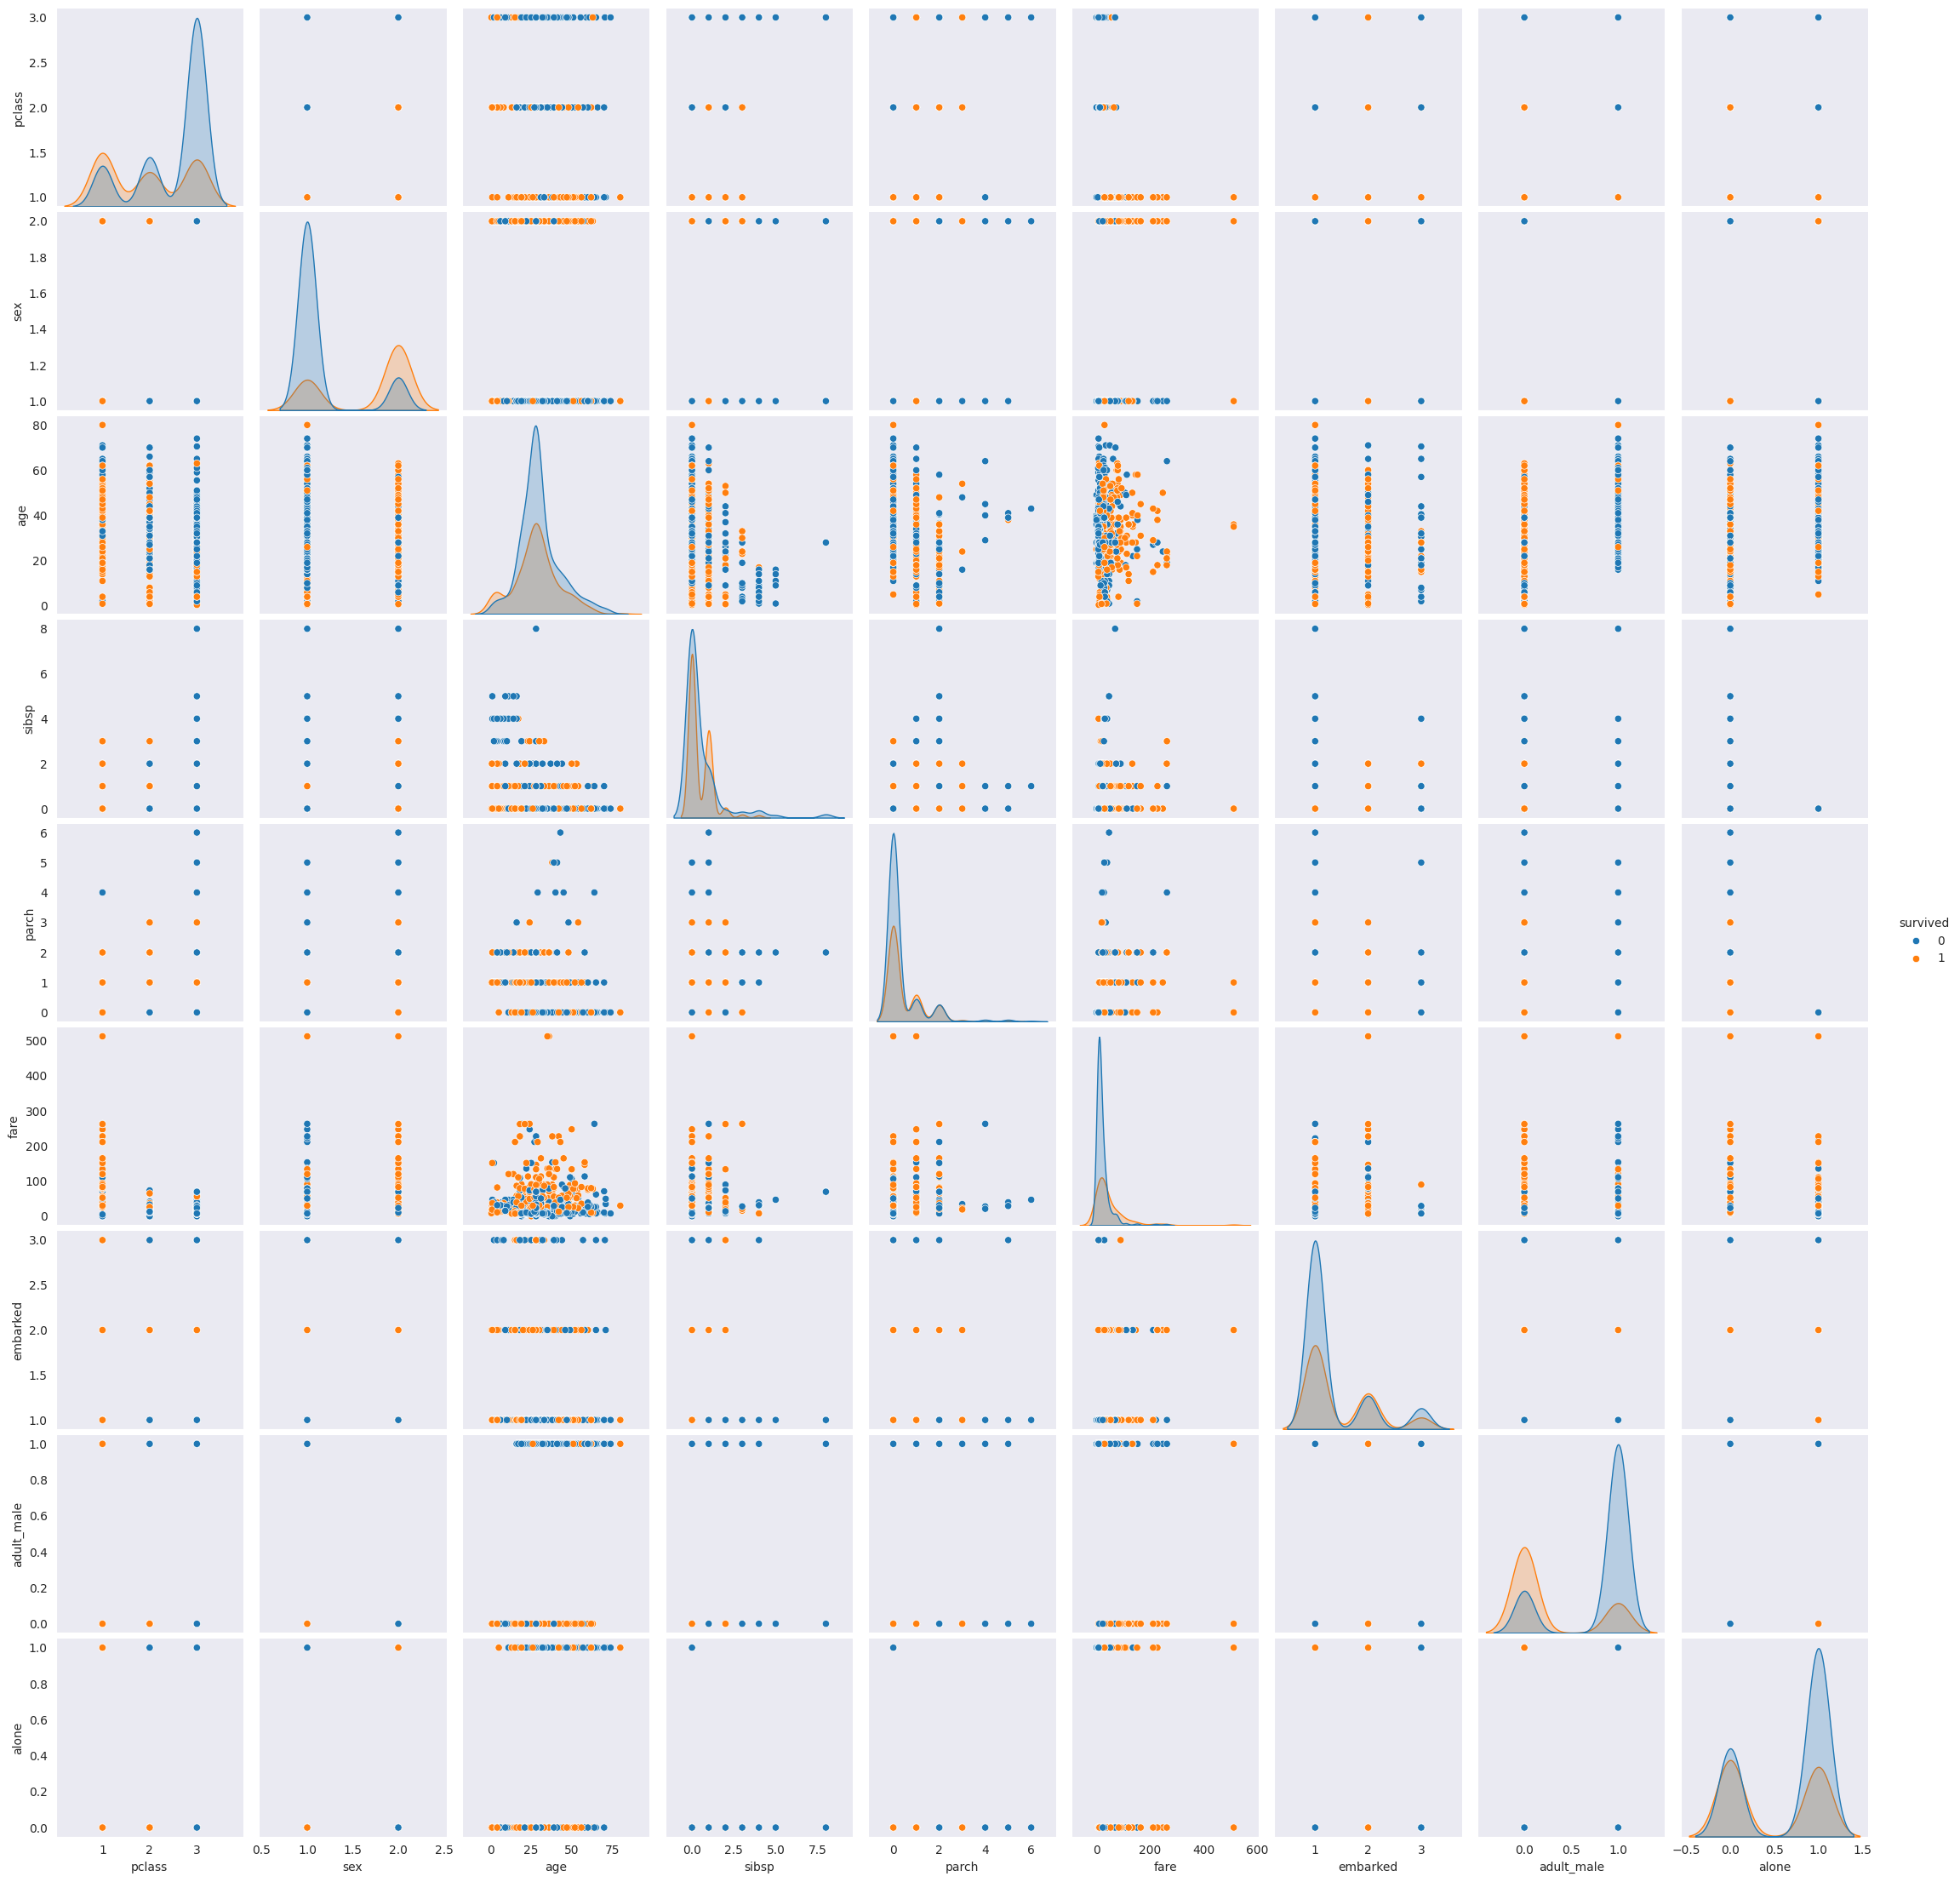

In [ ]:
sns.pairplot(titanic, hue= 'survived')

두 변수의 상관관계 시각화하기

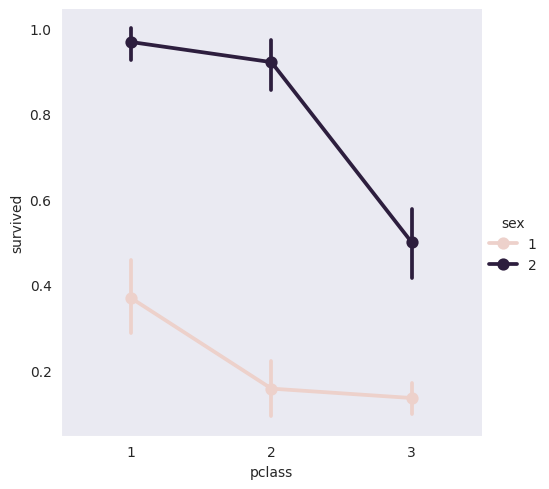

In [ ]:
# 객실등급(pclass)와 생존(survived) 상관관계
# catplot()

sns.catplot(x = 'pclass', y= 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()

In [ ]:
# 변수 사이의 상관관계를 히트맵(heatmap) 시각화 하기

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [ ]:
titanic['age'][:3]

0    22.0
1    38.0
2    26.0
Name: age, dtype: float64

In [ ]:
titanic['age'].apply(category_age)

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: age, Length: 891, dtype: int64

In [ ]:
titanic['age2'] = titanic['age'].apply(category_age)

In [ ]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,age2
0,0,3,1,22.0,1,0,7.2500,1,Third,man,True,no,False,2
1,1,1,2,38.0,1,0,71.2833,2,First,woman,False,yes,False,3
2,1,3,2,26.0,0,0,7.9250,1,Third,woman,False,yes,True,2


In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone', 'age2'],
      dtype='object')

In [ ]:
heatmap_data = titanic[['survived','sex','age2','pclass','fare']]

In [ ]:
heatmap_data[:3]

,survived,sex,age2,pclass,fare
0,0,1,2,3,7.2500
1,1,2,3,1,71.2833
2,1,2,2,3,7.9250


In [ ]:
heatmap_data.astype('float').corr()

,survived,sex,age2,pclass,fare
survived,1.000000,0.543351,-0.052184,-0.338481,0.257307
sex,0.543351,1.000000,-0.074415,-0.131900,0.182333
age2,-0.052184,-0.074415,1.000000,-0.339368,0.100123
pclass,-0.338481,-0.131900,-0.339368,1.000000,-0.549500
fare,0.257307,0.182333,0.100123,-0.549500,1.000000


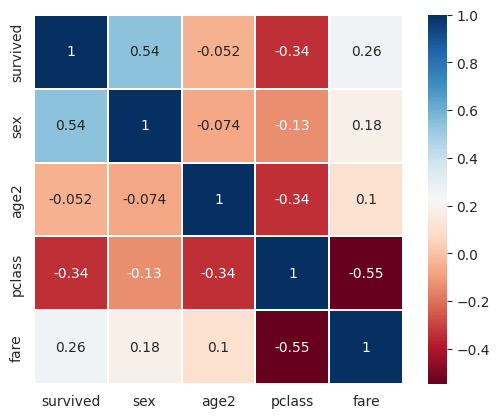

In [ ]:
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype('float').corr(),
            linewidth = 0.1,          # linewidth = 선 간격
            vmax = 1.0,               # value max 최대값 설정
            square= True,             # 정사각형
            cmap = colormap,          # cmap 을 컬러맵으로 설정
            linecolor= 'white',       # linecolor 색상
            annot= True,              # 상관관계 숫자 표시
            annot_kws = {'size': 10}  # 셀에 표시되는 숫자의 크기 설정
            )

plt.show()